# LIDC Transfer Learning Model: ERM and gDRO Comparisons

Thomas Zeng 7/8/2022

In this notebook, we do data analysis to compare results on the ERM and gDRO model. Both models had exactly the same hyperparameters except for loss function and were trained 50 times.

## Notebook Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm

## Get Dataframes

In [3]:
# names = {'entire': 'overall', 
#          'marked_benign':'spiculated benign', 
#          'unmarked_benign':'unspiculated benign', 
#          'marked_malignant':'spiculated malignant',
#          'unmarked_malignant':'unspiculated malignant'}

In [3]:
df_erm = pd.read_csv('../data/cluster_fixed_erm_results.csv', index_col=0)
# df_erm.rename(columns=names, inplace=True)
df_erm.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/cluser_fixed_erm_spic_results.csv'

In [77]:
df_gdro = pd.read_csv('../data/cluster_fixed_gdro_results.csv', index_col=0)
# df_gdro.rename(columns=names, inplace=True)
df_gdro.head()

,entire,0,1,2,4
0,0.883721,0.920635,0.950413,0.680556,0.977778
1,0.900332,0.984848,0.935185,0.721519,1.000000
2,0.843854,0.957143,0.858407,0.644737,0.976190
3,0.890365,0.982759,0.962617,0.688312,0.932203
4,0.877076,0.963415,0.907216,0.619048,0.983051


##Data Analysis 

###First we look at the mean overall accuracies and mean subgroup sensitivities

In [78]:
df_erm.mean()

entire    0.880155
0         0.943811
1         0.905475
2         0.723825
4         0.965929
dtype: float64

In [79]:
df_gdro.mean()

entire    0.879336
0         0.941734
1         0.891895
2         0.738674
4         0.970511
dtype: float64

###Now We plost histograms

In [58]:
bins = np.arange(0.4,1,0.05)

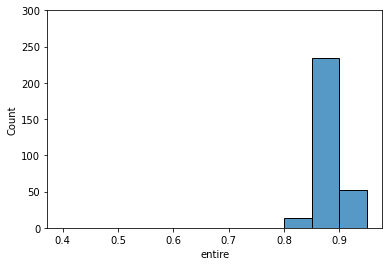

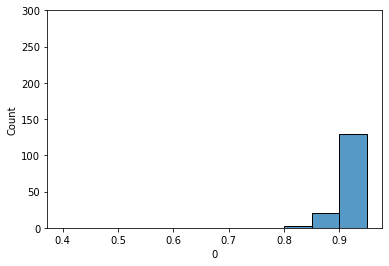

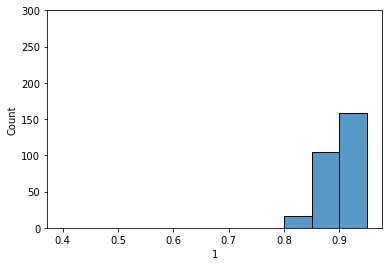

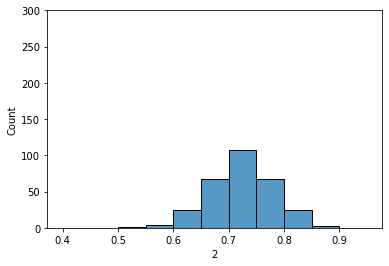

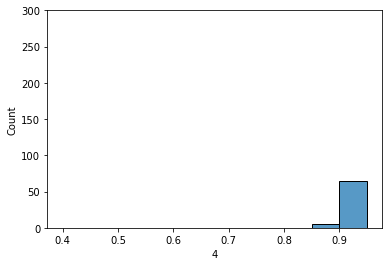

In [80]:
for idx, col in enumerate(df_erm.columns):
    plt.figure(idx)
    plt.ylim(0,300)
    sns.histplot(df_erm[col],bins=bins)

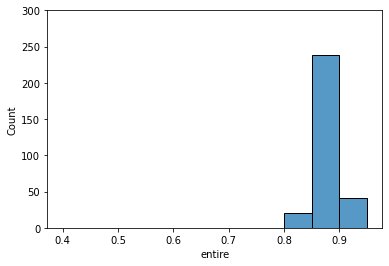

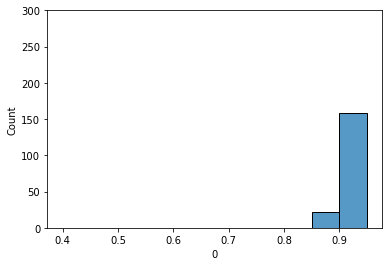

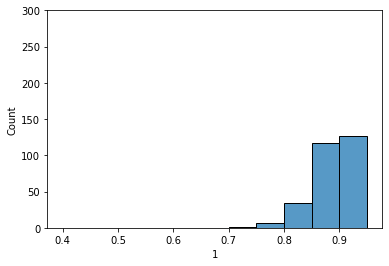

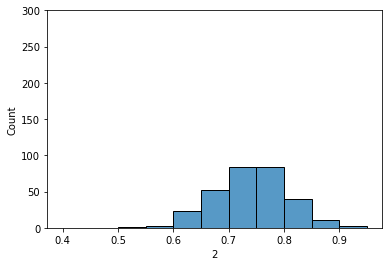

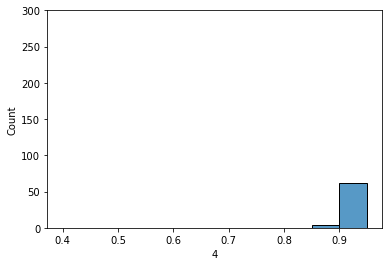

In [81]:
for idx, col in enumerate(df_gdro.columns):
    plt.figure(idx)
    plt.ylim(0,300)
    sns.histplot(df_gdro[col],bins=bins)

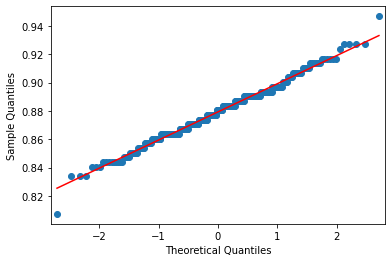

In [85]:
fig = sm.qqplot(df_gdro['entire'], line='s')
plt.show()

In [86]:
df_gdro['entire'].var()

0.0003952528228534395

In [87]:
df_erm['entire'].var()

0.0003473049540589818

###Now We make boxplots

(0.4, 1.01)

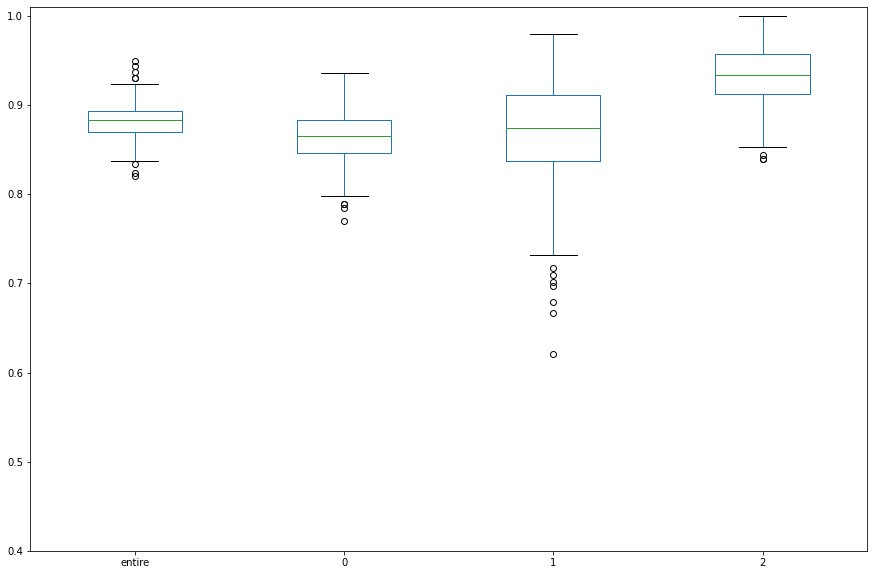

In [64]:
df_erm.boxplot(grid=False,figsize=(15,10)).set_ylim(0.4, 1.01)

(0.4, 1.01)

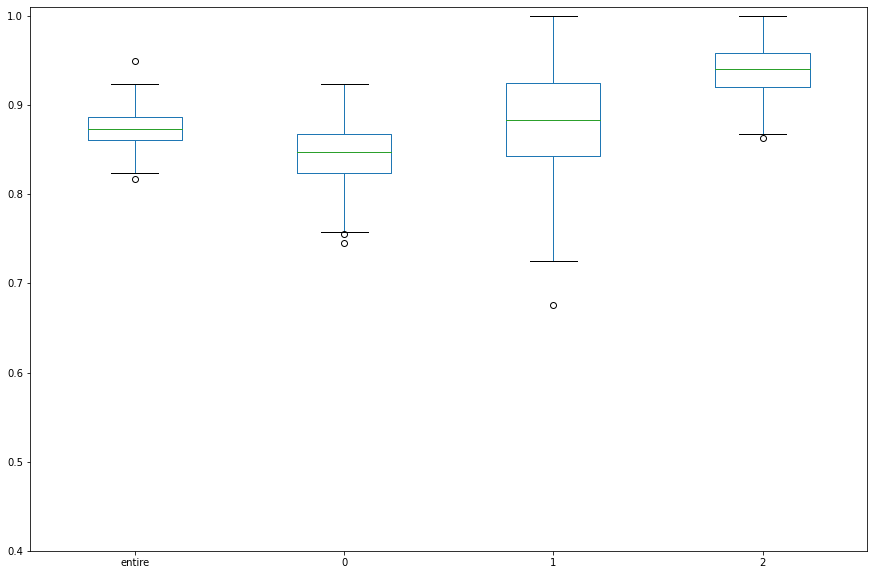

In [65]:
df_gdro.boxplot(grid=False,figsize=(15,10)).set_ylim(0.4, 1.01)

###Now We do T-Testing

In [88]:
ttests = zip(df_erm.columns, ttest_ind(df_erm, df_gdro)[1])
for name, val in ttests:
    print(f'{name:<23} {val:.3}')

entire                  0.603
0                       0.371
1                       5.3e-06
2                       0.00265
4                       0.0405
